In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_data = pd.read_csv('C:/Users/Admin/Downloads/iris.csv')
all_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

all_data.head()

In [3]:
all_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# we don't need column Id and species we drop them from out data

data = all_data.drop(columns=['Id','Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Normalize the original dataset
Calculate a covariance matrix between the normalized data points.
Calculate Eigenvalues and Eigenvectors for the Covariance Matrix.
Choose top N Eigenvectors as your Principal components based on their Eigenvalues.
Use the Eigenvectors to transform the original data to a new (lower dimension) space.

In [6]:
# the first step is standardizing the given data for this purpose we
# use min-max scaling

data = ((data - data.min()) / (data.max() - data.min()))
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [7]:
# second step is Calculating a covariance matrix 
# between the normalized data points.

# Cova(x, y) =(1/N-1)[ summation((xi - xmeani)*(yi - ymeani))]
def covariance_matrix(mean_subtracted):
    #calcualte covariance amongst scaled values
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()
        
    return np.dot(mean_subtracted.T,mean_subtracted)/(len(mean_subtracted) - 1)

cov = covariance_matrix(data)
cov

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [8]:
from numpy.linalg import eig as eigan
eigan_value,eigan_vector=eigan(cov)
print('eigan_value =',eigan_value)
print('eigan_vector =', eigan_vector)

eigan_value = [0.23231168 0.03239279 0.00963728 0.00175337]
eigan_vector = [[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


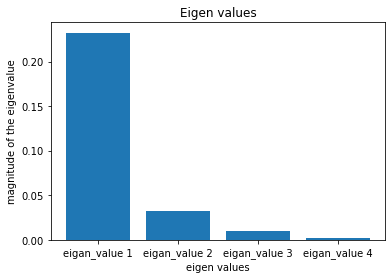

In [9]:
bar_name = ['eigan_value '+str(i+1) for i in range(len(eigan_value))]
plt.bar(bar_name,eigan_value)
plt.xlabel('eigen values')
plt.ylabel('magnitude of the eigenvalue')
plt.title('Eigen values')
plt.show()

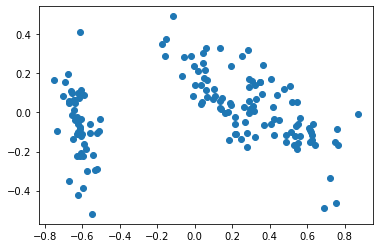

In [10]:
principal_components = eigan_vector[:,:2] #keeping only the first 2 eigenvectors
principle_data = np.dot(data.values, principal_components)#dot product of the two terms
plt.scatter(principle_data[:,0],principle_data[:,1])
plt.show()